###Getting the data ready

Mount the Drive

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import the Dataset

In [ ]:
import pandas as pd 
import time
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/drive/MyDrive/Bitcoin Heist/Data/final_data.csv', index_col=0)   #Change Path to your Drive Directory accordingly.
data = data.drop(['address'],axis = 1)
classes = data.label.unique()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Print the head & tail of the dataset with it's statistical information and description.

In [ ]:
print(data.head())
print(data.tail())
print(data.describe())
print(data.info())

   year  day  length    weight  ...  looped  neighbors       income            label
0  2017   11      18  0.008333  ...       0          2  100050000.0  princetonCerber
1  2016  132      44  0.000244  ...       0          1  100000000.0   princetonLocky
2  2016  246       0  1.000000  ...       0          2  200000000.0  princetonCerber
3  2016  322      72  0.003906  ...       0          2   71200000.0  princetonCerber
4  2016  238     144  0.072848  ...       0          1  200000000.0   princetonLocky

[5 rows x 9 columns]
        year  day  length    weight  ...  looped  neighbors        income  label
315195  2018  330       0  0.111111  ...       0          2  2.503180e+09  white
315196  2018  330       0  0.500000  ...       0          2  1.000000e+09  white
315197  2018  330       6  0.020092  ...       0          1  3.000000e+08  white
315198  2018  330       0  0.333333  ...       0          2  1.372746e+09  white
315199  2018  330       6  1.000000  ...       0          2  2.

###Data Pre-processing & Visualizations

Cleanse the target variables (labels) in the data

In [ ]:
data=data.replace('white','White')
data=data.replace('paduaCryptoWall','CryptoWall')
data=data.replace('montrealCryptoLocker','CryptoLocker')
data=data.replace('princetonCerber','Cerber')
data=data.replace('princetonLocky','Locky')
data=data.replace('montrealCryptXXX','CryptXXX')
data=data.replace('montrealNoobCrypt','NoobCrypt')
data=data.replace('montrealDMALockerv3','DMA Lockerv3')
data=data.replace('montrealDMALocker','DMA Locker')
data=data.replace('montrealSamSam','SamSam')
data=data.replace('montrealCryptoTorLocker2015','CryptoTorLocker2015')
data=data.replace('montrealGlobeImposter','GlobeImposter')
data=data.replace('montrealGlobev3','Globev3')
data=data.replace('montrealGlobe','Globe')
data=data.replace('montrealWannaCry','WannaCry')
data=data.replace('montrealRazy','Razy')
data=data.replace('montrealAPT','APT')
data=data.replace('paduaKeRanger','KeRanger')
data=data.replace('montrealFlyper','Flyper')
data=data.replace('montrealXTPLocker','XTP Locker')
data=data.replace('montrealVenusLocker','Venus Locker')
data=data.replace('montrealCryptConsole','CryptConsole')
data=data.replace('montrealXLockerv5.0','XLockerv5')
data=data.replace('montrealEDA2','EDA2')
data=data.replace('montrealJigSaw','Montreal - JigSaw')
data=data.replace('paduaJigsaw','Padua - Jigsaw')
data=data.replace('montrealXLocker','XLocker')
data=data.replace('montrealSam','Sam')
data=data.replace('montrealComradeCircle','Comrade Circle')

Remove target variables with very less count

In [ ]:
data = data[(data.label != 'XLocker') & (data.label != 'Comrade Circle') & (data.label != 'Sam')]
print(data)

        year  day  length    weight  ...  looped  neighbors        income   label
0       2017   11      18  0.008333  ...       0          2  1.000500e+08  Cerber
1       2016  132      44  0.000244  ...       0          1  1.000000e+08   Locky
2       2016  246       0  1.000000  ...       0          2  2.000000e+08  Cerber
3       2016  322      72  0.003906  ...       0          2  7.120000e+07  Cerber
4       2016  238     144  0.072848  ...       0          1  2.000000e+08   Locky
...      ...  ...     ...       ...  ...     ...        ...           ...     ...
315195  2018  330       0  0.111111  ...       0          2  2.503180e+09   White
315196  2018  330       0  0.500000  ...       0          2  1.000000e+09   White
315197  2018  330       6  0.020092  ...       0          1  3.000000e+08   White
315198  2018  330       0  0.333333  ...       0          2  1.372746e+09   White
315199  2018  330       6  1.000000  ...       0          2  2.397816e+09   White

[315194 rows x 

Plot the correlation matrix

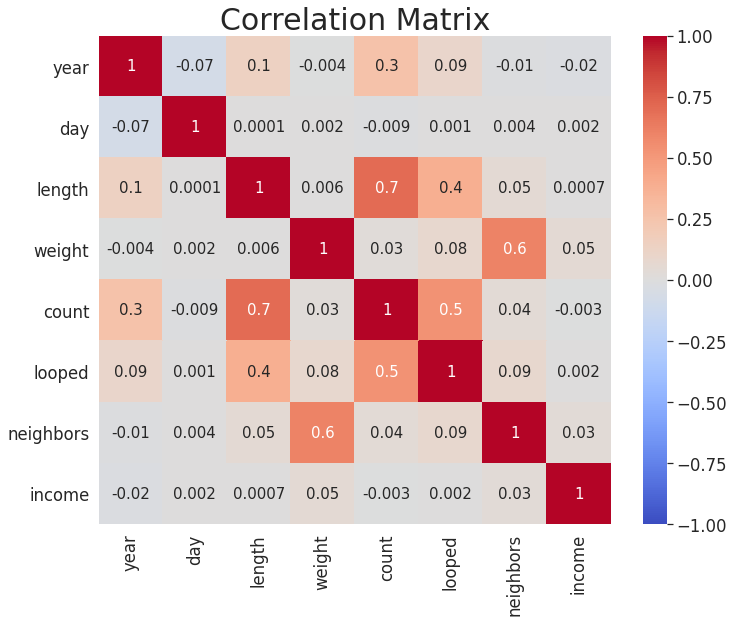

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10.7,9)})
corrMatrix = data.corr()
sns.set(font_scale=1.5)
sns.heatmap(corrMatrix, annot=True, fmt='.1g',vmin=-1, vmax=1, center= 0,cmap='coolwarm',annot_kws={"size":15})
plt.title('Correlation Matrix', fontsize = 30)
plt.tight_layout()
# plt.savefig('/content/drive/MyDrive/Bitcoin Heist/Plots/Correlation Matrix.png',dpi=700)
plt.show()

In [ ]:
print('Value Counts:\n',data['label'].value_counts())
print('Total labels: ',len(data['label'].unique()))

Value Counts:
 White                  232374
CryptoWall              24780
CryptoLocker            18630
Cerber                  18446
Locky                   13250
CryptXXX                 4838
NoobCrypt                 966
DMA Lockerv3              708
DMA Locker                502
SamSam                    124
GlobeImposter             110
CryptoTorLocker2015       110
Globev3                    68
Globe                      64
WannaCry                   56
Razy                       26
APT                        22
KeRanger                   20
Flyper                     18
XTP Locker                 16
Venus Locker               14
CryptConsole               14
XLockerv5                  14
EDA2                       12
Montreal - JigSaw           8
Padua - Jigsaw              4
Name: label, dtype: int64
Total labels:  26


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


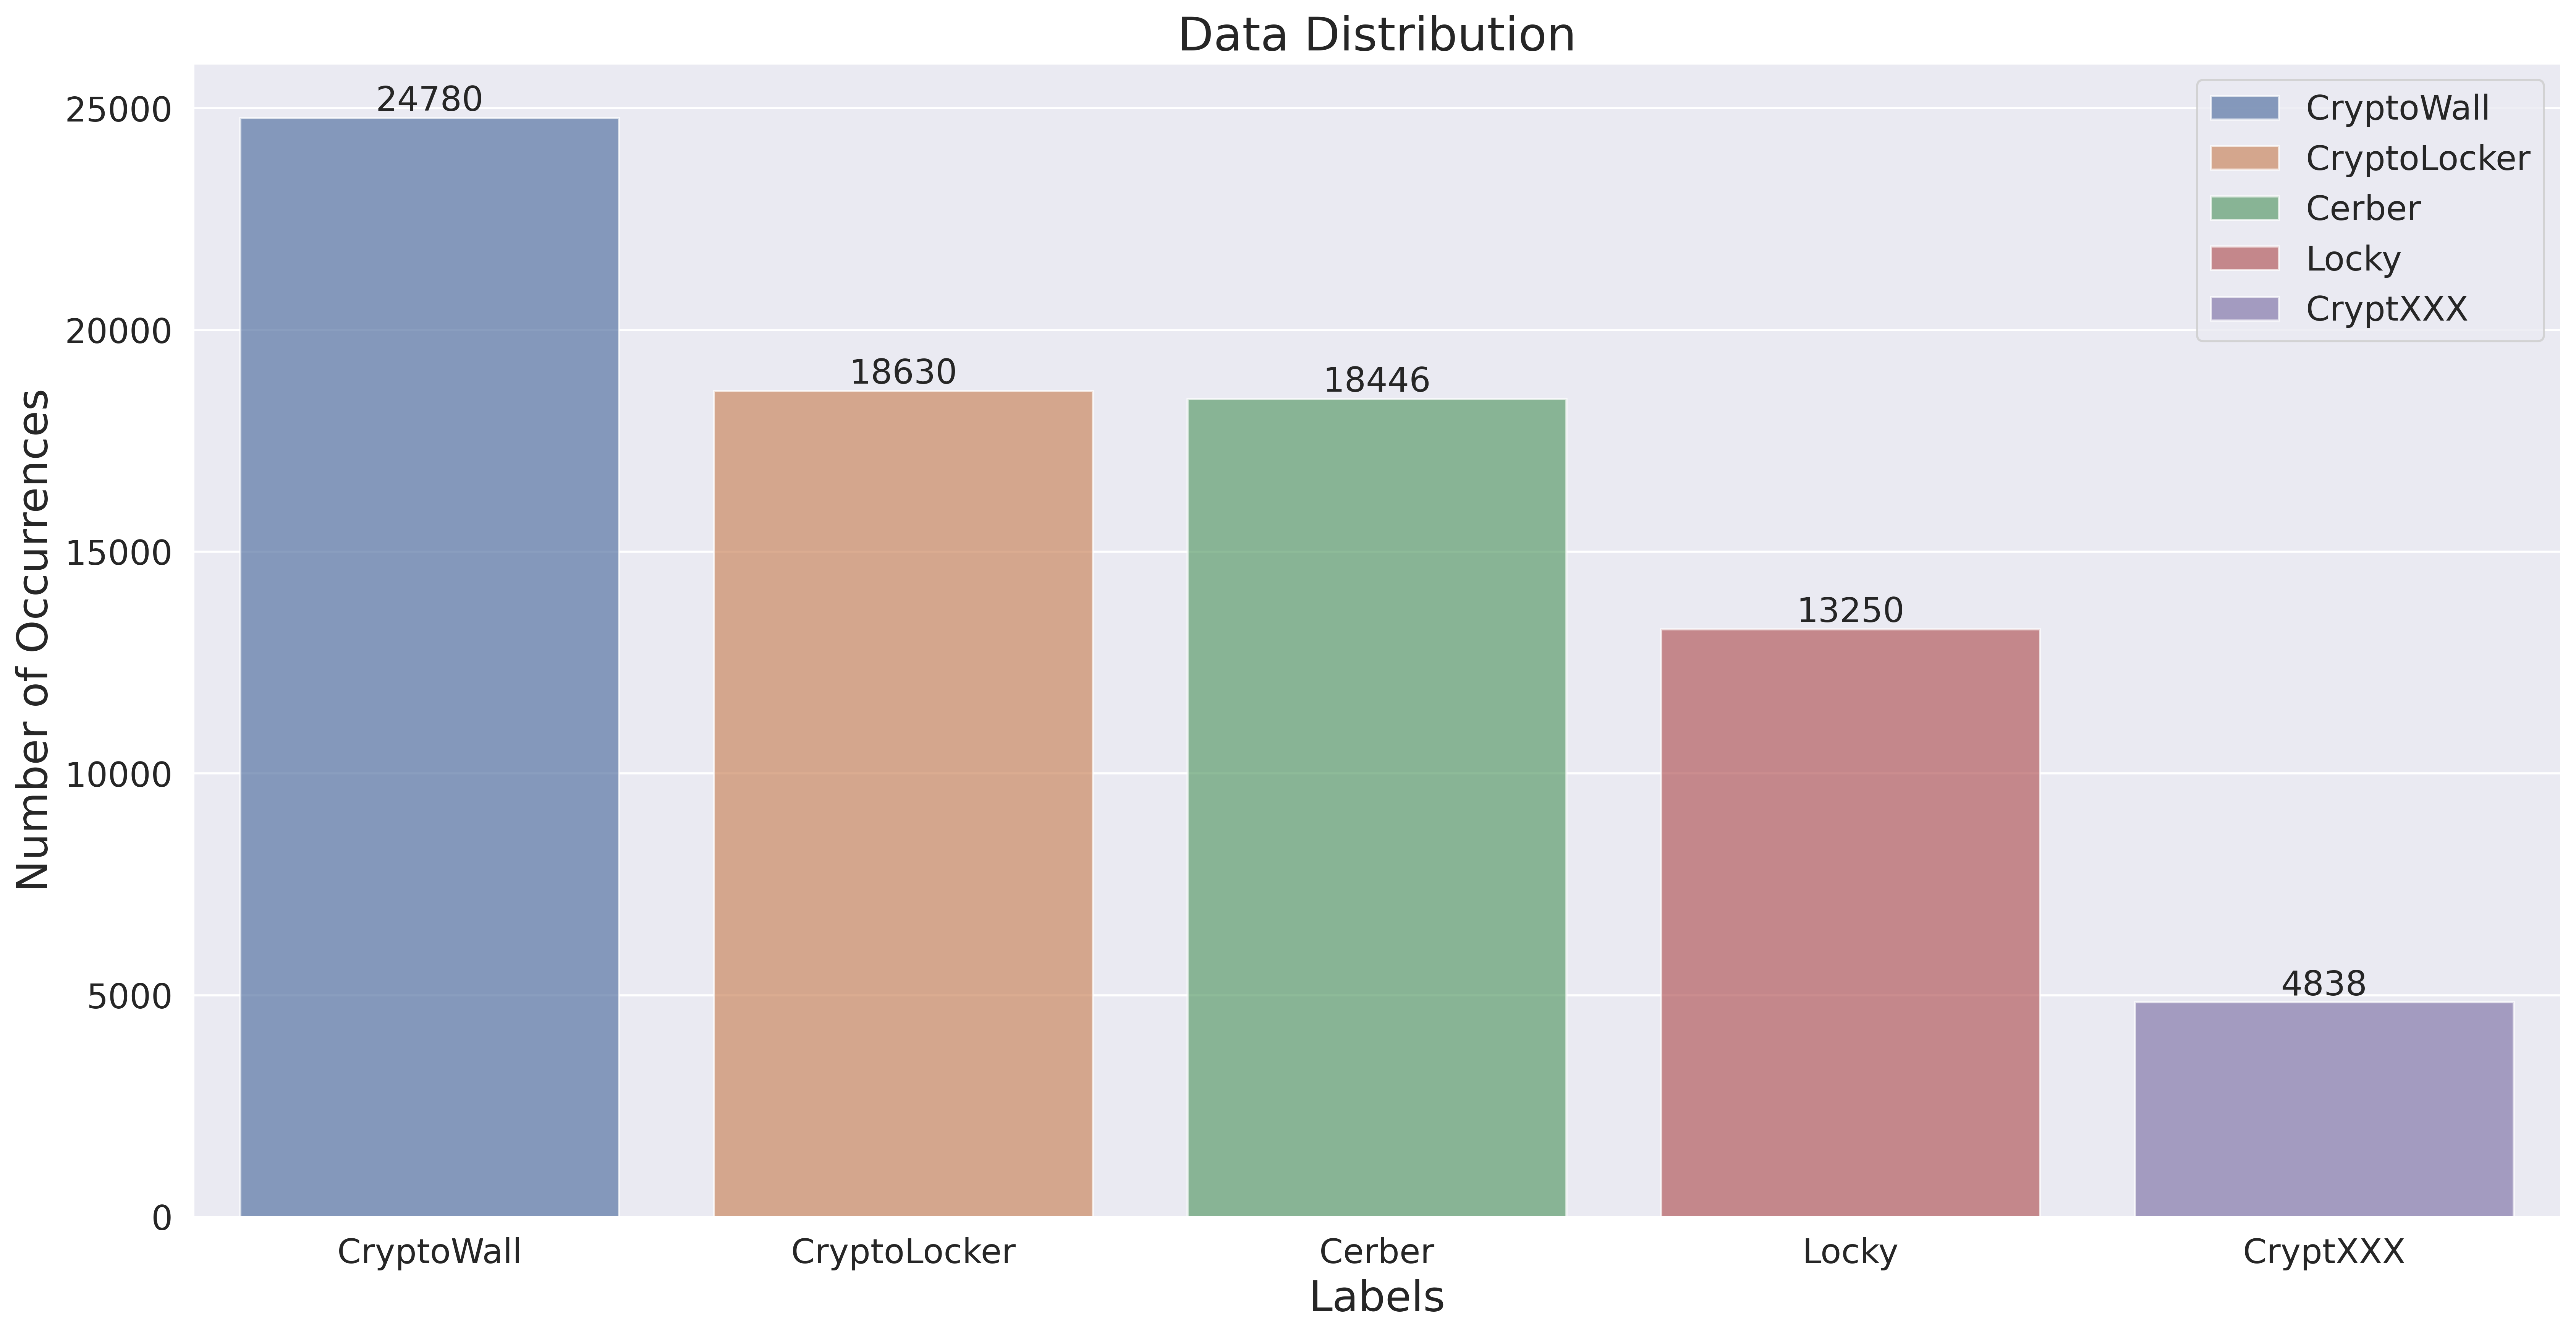

In [ ]:
data= data.loc[data["label"] != "white"]
CryptoWall=data.loc[data['label']=='CryptoWall']
CryptoLocker=data.loc[data['label']=='CryptoLocker']
Cerber=data.loc[data['label']=='Cerber']
Locky=data.loc[data['label']=='Locky']
CryptXXX=data.loc[data['label']=='CryptXXX']
data1=CryptoWall.append([CryptoLocker,Cerber,Locky,CryptXXX])
l_counts=data1['label'].value_counts()

plt.figure(figsize=(20,10),dpi=400)
bar=plt.bar(l_counts.index, l_counts.values, alpha=0)
sns.barplot(l_counts.index, l_counts.values, alpha=0.7, hue=l_counts.index,dodge=False)
plt.legend(fontsize=16)
plt.title('Data Distribution', fontsize=22)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Labels', fontsize=20)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom', fontsize=16)

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


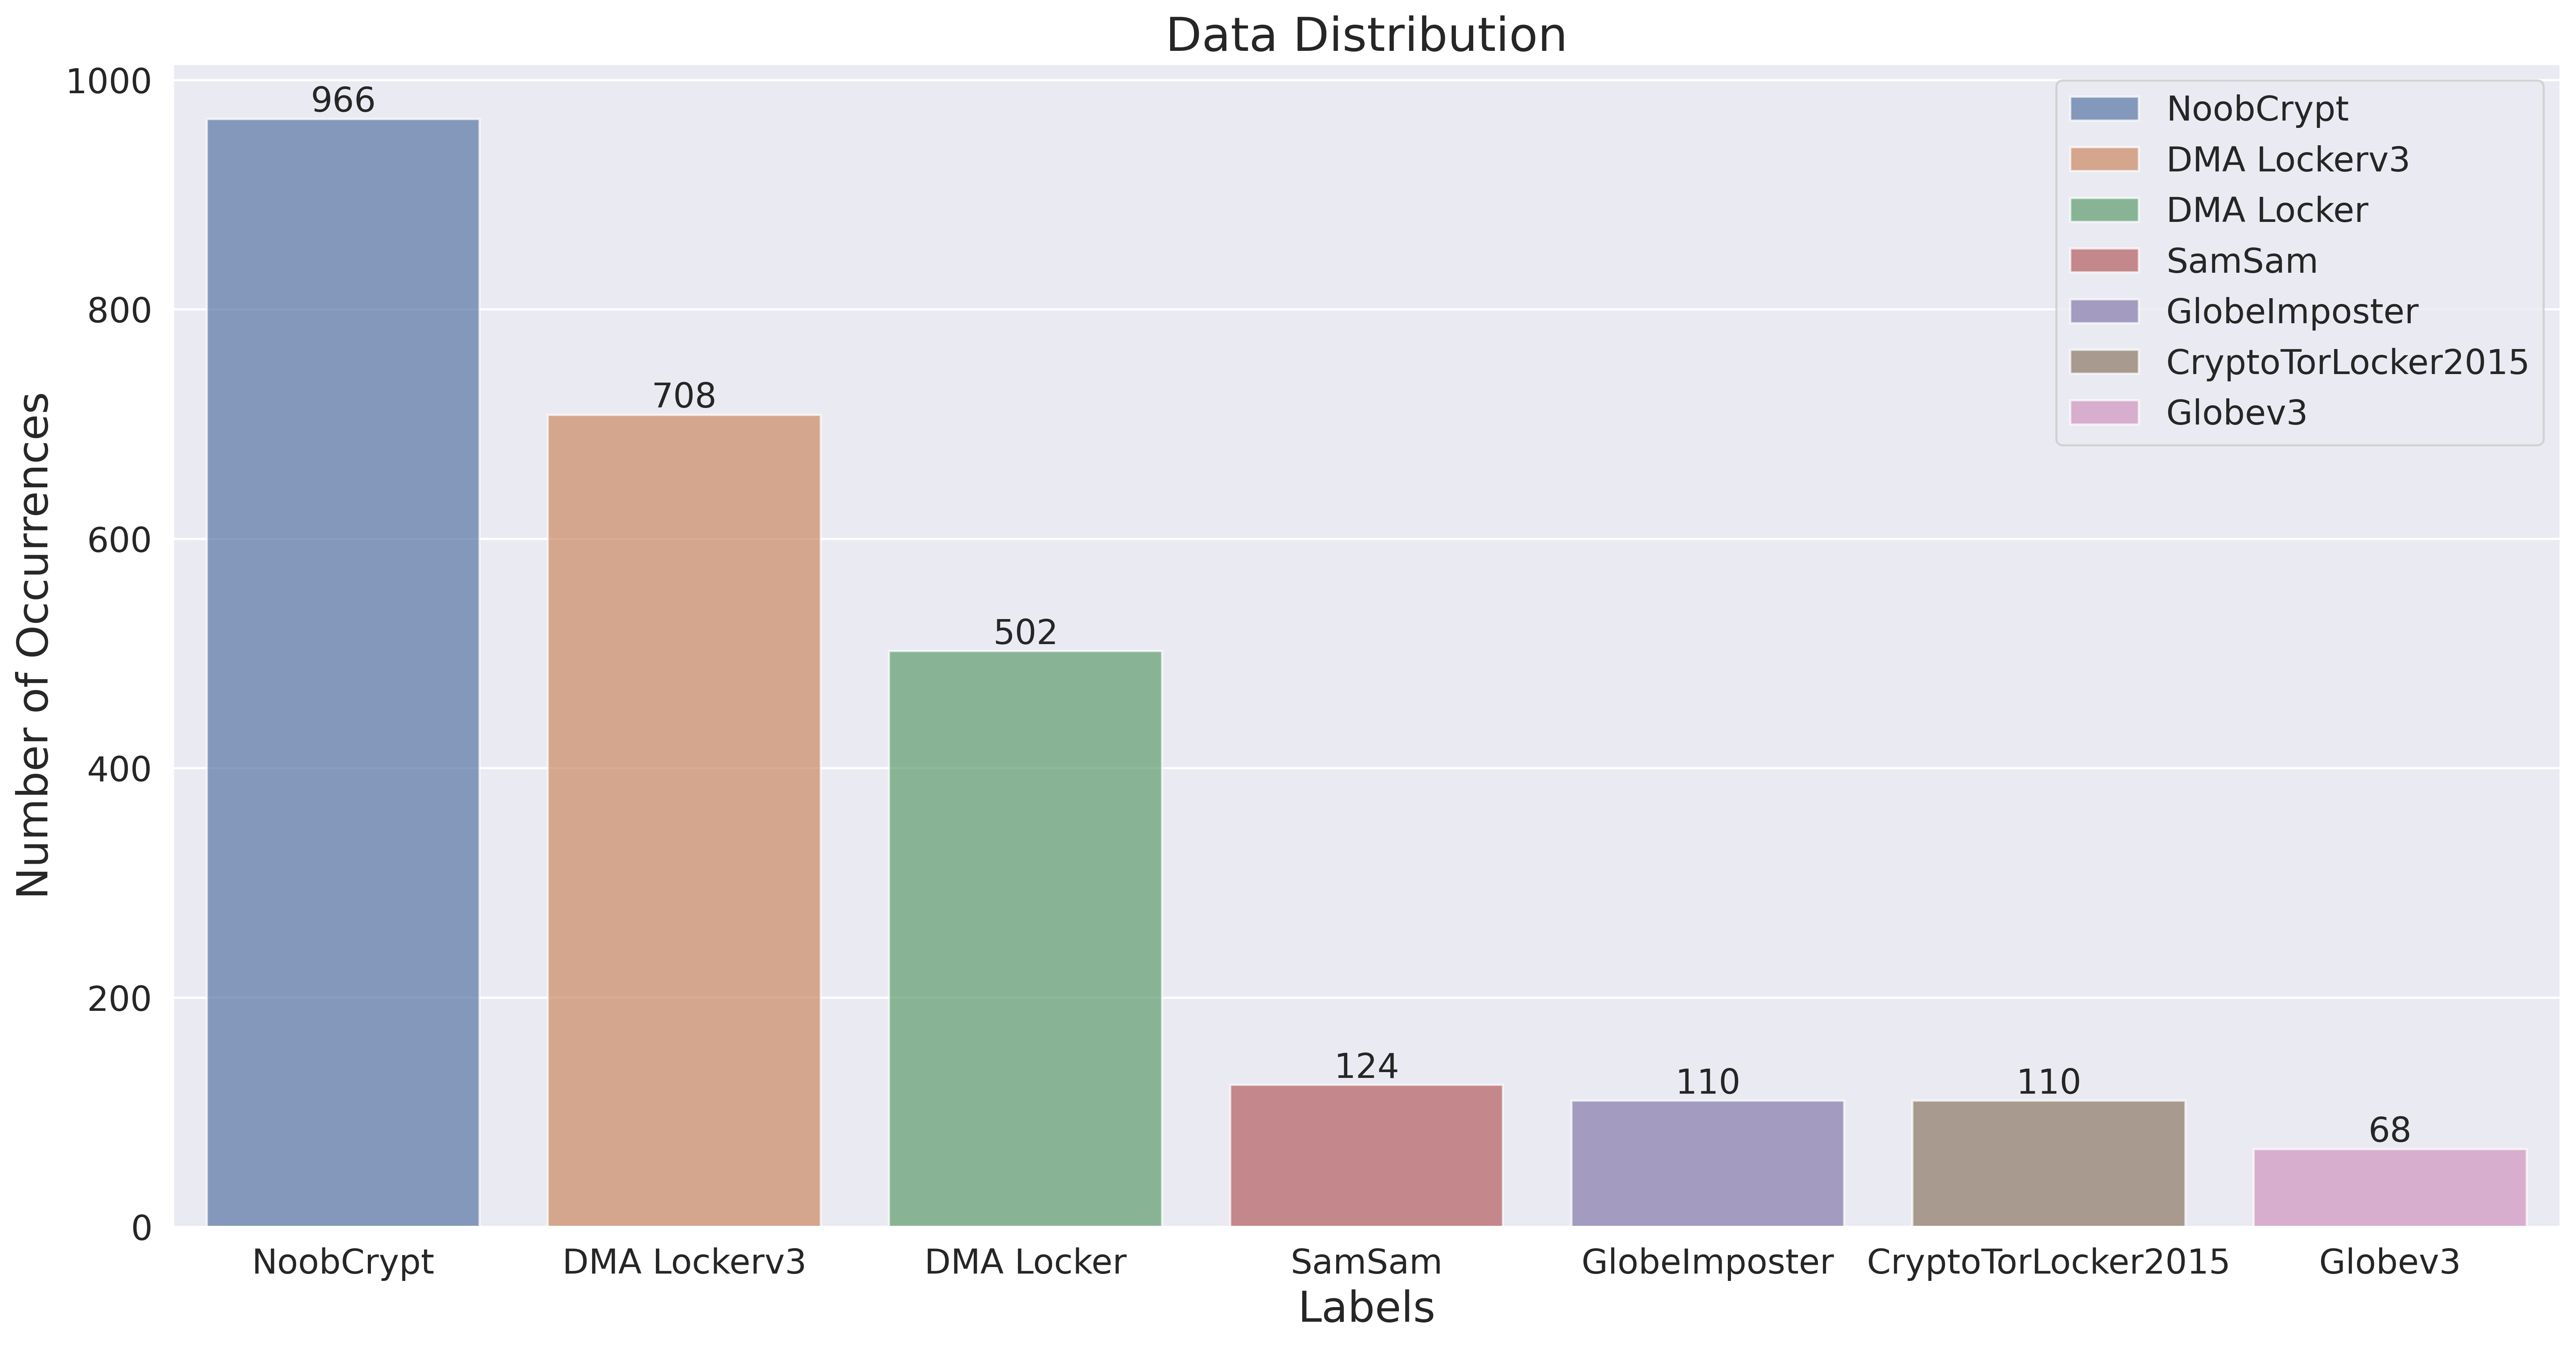

In [ ]:
DMALockerv3=data.loc[data['label']=='DMA Lockerv3'];
DMALocker=data.loc[data['label']=='DMA Locker'];
SamSam=data.loc[data['label']=='SamSam'];
GlobeImposter=data.loc[data['label']=='GlobeImposter'];
CryptoTorLocker2015=data.loc[data['label']=='CryptoTorLocker2015'];
Globev3=data.loc[data['label']=='Globev3'];
NoobCrypt=data.loc[data['label']=='NoobCrypt'];
data2=DMALockerv3.append([DMALocker,SamSam,GlobeImposter,CryptoTorLocker2015,Globev3,NoobCrypt]);
l_counts=data2['label'].value_counts();


plt.figure(figsize=(20,10),dpi=400)
bar=plt.bar(l_counts.index, l_counts.values, alpha=0)
sns.barplot(l_counts.index, l_counts.values, alpha=0.7, hue=l_counts.index,dodge=False)
plt.legend(fontsize=16)
plt.title('Data Distribution', fontsize=22)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Labels', fontsize=20)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom', fontsize=16)

plt.show()

In [ ]:
Globe=data.loc[data['label']=='Globe'];
WannaCry=data.loc[data['label']=='WannaCry'];
Razy=data.loc[data['label']=='Razy'];
APT=data.loc[data['label']=='APT'];
KeRanger=data.loc[data['label']=='KeRanger'];
Flyper=data.loc[data['label']=='Flyper'];
XTPLocker=data.loc[data['label']=='XTP Locker'];
VenusLocker=data.loc[data['label']=='Venus Locker'];
XLockerv5=data.loc[data['label']=='XLockerv5'];
CryptConsole=data.loc[data['label']=='CryptConsole'];
EDA2=data.loc[data['label']=='EDA2'];
MontrealJigSaw=data.loc[data['label']=='MontrealJigSaw'];
PaduaJigsaw=data.loc[data['label']=='PaduaJigsaw'];
data3=Globe.append([WannaCry,Razy,APT,KeRanger,Flyper,XTPLocker,VenusLocker,XLockerv5,CryptConsole,EDA2,MontrealJigSaw,PaduaJigsaw]);
l_counts=data3['label'].value_counts();

plt.figure(figsize=(50,20),dpi=400)
bar=plt.bar(l_counts.index, l_counts.values, alpha=0)
sns.barplot(l_counts.index, l_counts.values, alpha=0.7, hue=l_counts.index,dodge=False)
plt.legend(fontsize=16)
plt.title('Data Distribution', fontsize=44)
plt.ylabel('Number of Occurrences', fontsize=60)
plt.xlabel('Labels', fontsize=60)
plt.xticks(fontsize=32);
plt.yticks(fontsize=32);
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom', fontsize=32)

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Log Transformations , Run only once :) <br> 
Skewed distribution --> Gaussian distribution

In [ ]:
import numpy as np
eps = 0.001
data['income'] = np.log(data.pop('income')+eps)
data['weight'] = np.log(data.pop('weight')+eps)
data['count'] = np.log(data.pop('count')+eps)
data['looped'] = np.log(data.pop('looped')+eps)
data['neighbors'] = np.log(data.pop('neighbors')+eps)
data['length'] = np.log(data.pop('length')+eps)
data['day'] = np.log(data.pop('day')+eps)

print(data['length'].min())
print(data['length'].max())
print(data['count'].min())
print(data['count'].max())
print(data.looped.min())
print(data.looped.max())
print(data.neighbors.min())
print(data.neighbors.max())
print(data.income.min())
print(data.income.max())
print(data.weight.min())
print(data.weight.max())

-6.907755278982137
4.969820243996333
0.0009995003330834232
9.581628097267306
-6.907755278982137
9.581628097267306
0.0009995003330834232
7.340836202631495
17.216707939659763
31.536556508367305
-6.907755278982137
6.211181285295772


Pairplot to get more insights in the data & find hidden patterns if any

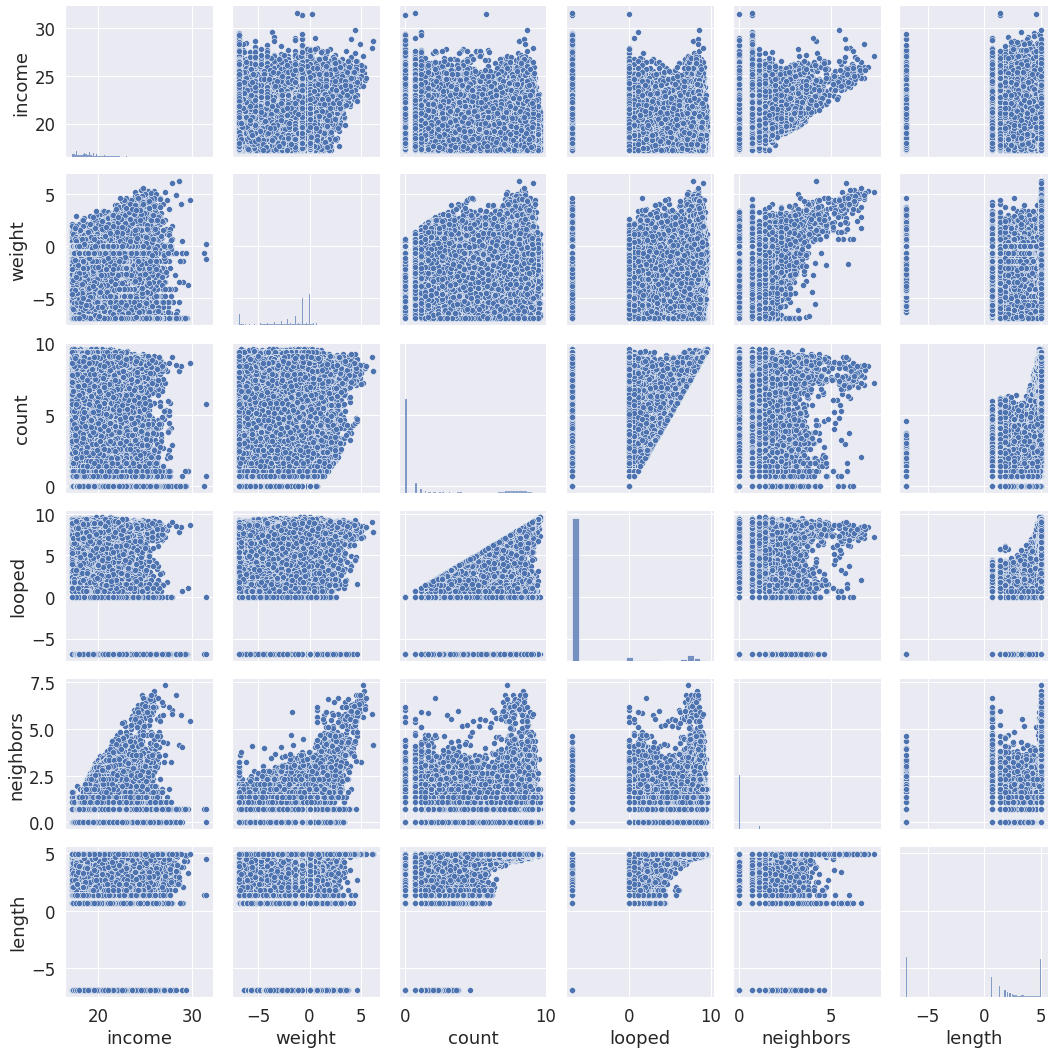

In [ ]:
feats = ['label', 'income', 'weight', 'count', 'looped', 'neighbors','length']
sns.pairplot(data[feats],height=2.5)
plt.show()

Apply MinMaxScaler

In [ ]:
col_names = ['year', 'income', 'weight', 'count', 'looped', 'neighbors', 'length', 'day']
features = data[col_names]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ct = ColumnTransformer([('somename', MinMaxScaler(), ['year', 'income', 'weight', 'count', 'looped', 'neighbors', 'length', 'day'])], remainder='passthrough')
data = ct.fit_transform(data)

Convert the data back to a dataframe

In [ ]:
data = pd.DataFrame(data, columns = ['year','day', 'length','weight',  'count', 'looped', 'neighbors',  'income', 'label'])
print(data)

            year        day     length  ... neighbors    income   label
0       0.857143  0.0841121   0.170257  ...  0.824931  0.406345  Cerber
1       0.714286  0.0840772  0.0166511  ...  0.900181   0.82758   Locky
2       0.714286   0.132482   0.526625  ...         0  0.933112  Cerber
3       0.714286  0.0603565   0.121238  ...  0.941643  0.978751  Cerber
4       0.714286   0.132482   0.327924  ...         1  0.927508   Locky
...          ...        ...        ...  ...       ...       ...     ...
315189         1    0.30895   0.359746  ...         0  0.982911   White
315190         1   0.244874   0.473865  ...         0  0.982911   White
315191         1   0.160797   0.232406  ...  0.732446  0.982911   White
315192         1   0.266998   0.443034  ...         0  0.982911   White
315193         1   0.305947   0.526625  ...  0.732446  0.982911   White

[315194 rows x 9 columns]


Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
data['label'] = le2.fit_transform(data['label'])
data['label'].unique()
print(le2.classes_)

labels = le2.inverse_transform(data['label'])
len(data.label.unique())

['APT' 'Cerber' 'CryptConsole' 'CryptXXX' 'CryptoLocker'
 'CryptoTorLocker2015' 'CryptoWall' 'DMA Locker' 'DMA Lockerv3' 'EDA2'
 'Flyper' 'Globe' 'GlobeImposter' 'Globev3' 'KeRanger' 'Locky'
 'Montreal - JigSaw' 'NoobCrypt' 'Padua - Jigsaw' 'Razy' 'SamSam'
 'Venus Locker' 'WannaCry' 'White' 'XLockerv5' 'XTP Locker']


26

###Split the dataset

Divide the dataset into Independent & Dependent variables

In [ ]:
X = data.loc[:, data.columns != 'label']
y = data['label']

Split the dataset into train and test set in a stratified fashion w.r.t. label (80-20)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 2020, stratify=y, shuffle=True)
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')

Print length of the test & train set

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

252155
63039
252155
63039


###XGBoost

Use GridSearchCV to get the best parameters

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold

xgb_model = XGBClassifier()

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'learning_rate': [0.1], #so called `eta` value
              'max_depth': [9],
              'min_child_weight': [1],
              'silent': [1],
              'subsample': [1],
              'colsample_bytree': [0.5],
              'tree_method' : ['gpu_hist'],
              'n_estimators': [500, 1850] #number of trees, change it to 1000 for better results
              }

clf = GridSearchCV(xgb_model, parameters, n_jobs = -1,
                   cv=StratifiedKFold(n_splits=2), 
                   scoring='accuracy',
                   verbose=2, refit=True)

clf.fit(np.array(X),np.array(y))
print(clf.best_params_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 19.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 19.9min finished


{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 1850, 'nthread': 4, 'silent': 1, 'subsample': 1, 'tree_method': 'gpu_hist'}


Train XGBoost with best parameters

In [ ]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(learning_rate = 0.1, max_depth = 9, min_child_weight = 1, n_estimators = 1850, nthread = 4, silent = 1, subsample = 1, tree_method = 'gpu_hist')
# Add silent=True to avoid printing out updates with each cycle
model_xgb.fit(np.array(X_train), np.array(y_train), verbose=2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=1850, n_jobs=1,
              nthread=4, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=1, subsample=1, tree_method='gpu_hist', verbosity=1)

Check model performance

In [ ]:
predictions = model_xgb.predict(np.array(X_test))
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_test, predictions) 
acc = accuracy_score(y_test, predictions)
f1_score = f1_score(y_test, predictions,average='weighted')
recall = recall_score(y_test, predictions,average='weighted')
precision = precision_score(y_test, predictions,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

Mean Absolute Error :  0.852043972778756
Accuracy:  0.9513475784831612
Recall:  0.9513475784831612
Precision:  0.952761051845621
F1-score:  0.9516853397696341


Print the classification report

In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_test, predictions, target_names=le2.classes_, digits = 4, output_dict=True)
classification_metrics_xgb = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_xgb)

                     precision    recall  f1-score       support
APT                   1.000000  0.500000  0.666667      4.000000
Cerber                0.908689  0.946869  0.927386   3689.000000
CryptConsole          0.750000  1.000000  0.857143      3.000000
CryptXXX              0.966463  0.982438  0.974385    968.000000
CryptoLocker          0.835899  0.859903  0.847731   3726.000000
CryptoTorLocker2015   0.833333  0.909091  0.869565     22.000000
CryptoWall            0.862369  0.960856  0.908952   4956.000000
DMA Locker            0.843373  0.700000  0.765027    100.000000
DMA Lockerv3          0.822695  0.816901  0.819788    142.000000
EDA2                  1.000000  1.000000  1.000000      2.000000
Flyper                0.500000  0.250000  0.333333      4.000000
Globe                 0.916667  0.846154  0.880000     13.000000
GlobeImposter         0.944444  0.772727  0.850000     22.000000
Globev3               0.916667  0.785714  0.846154     14.000000
KeRanger              1.0

Confusion Matrix

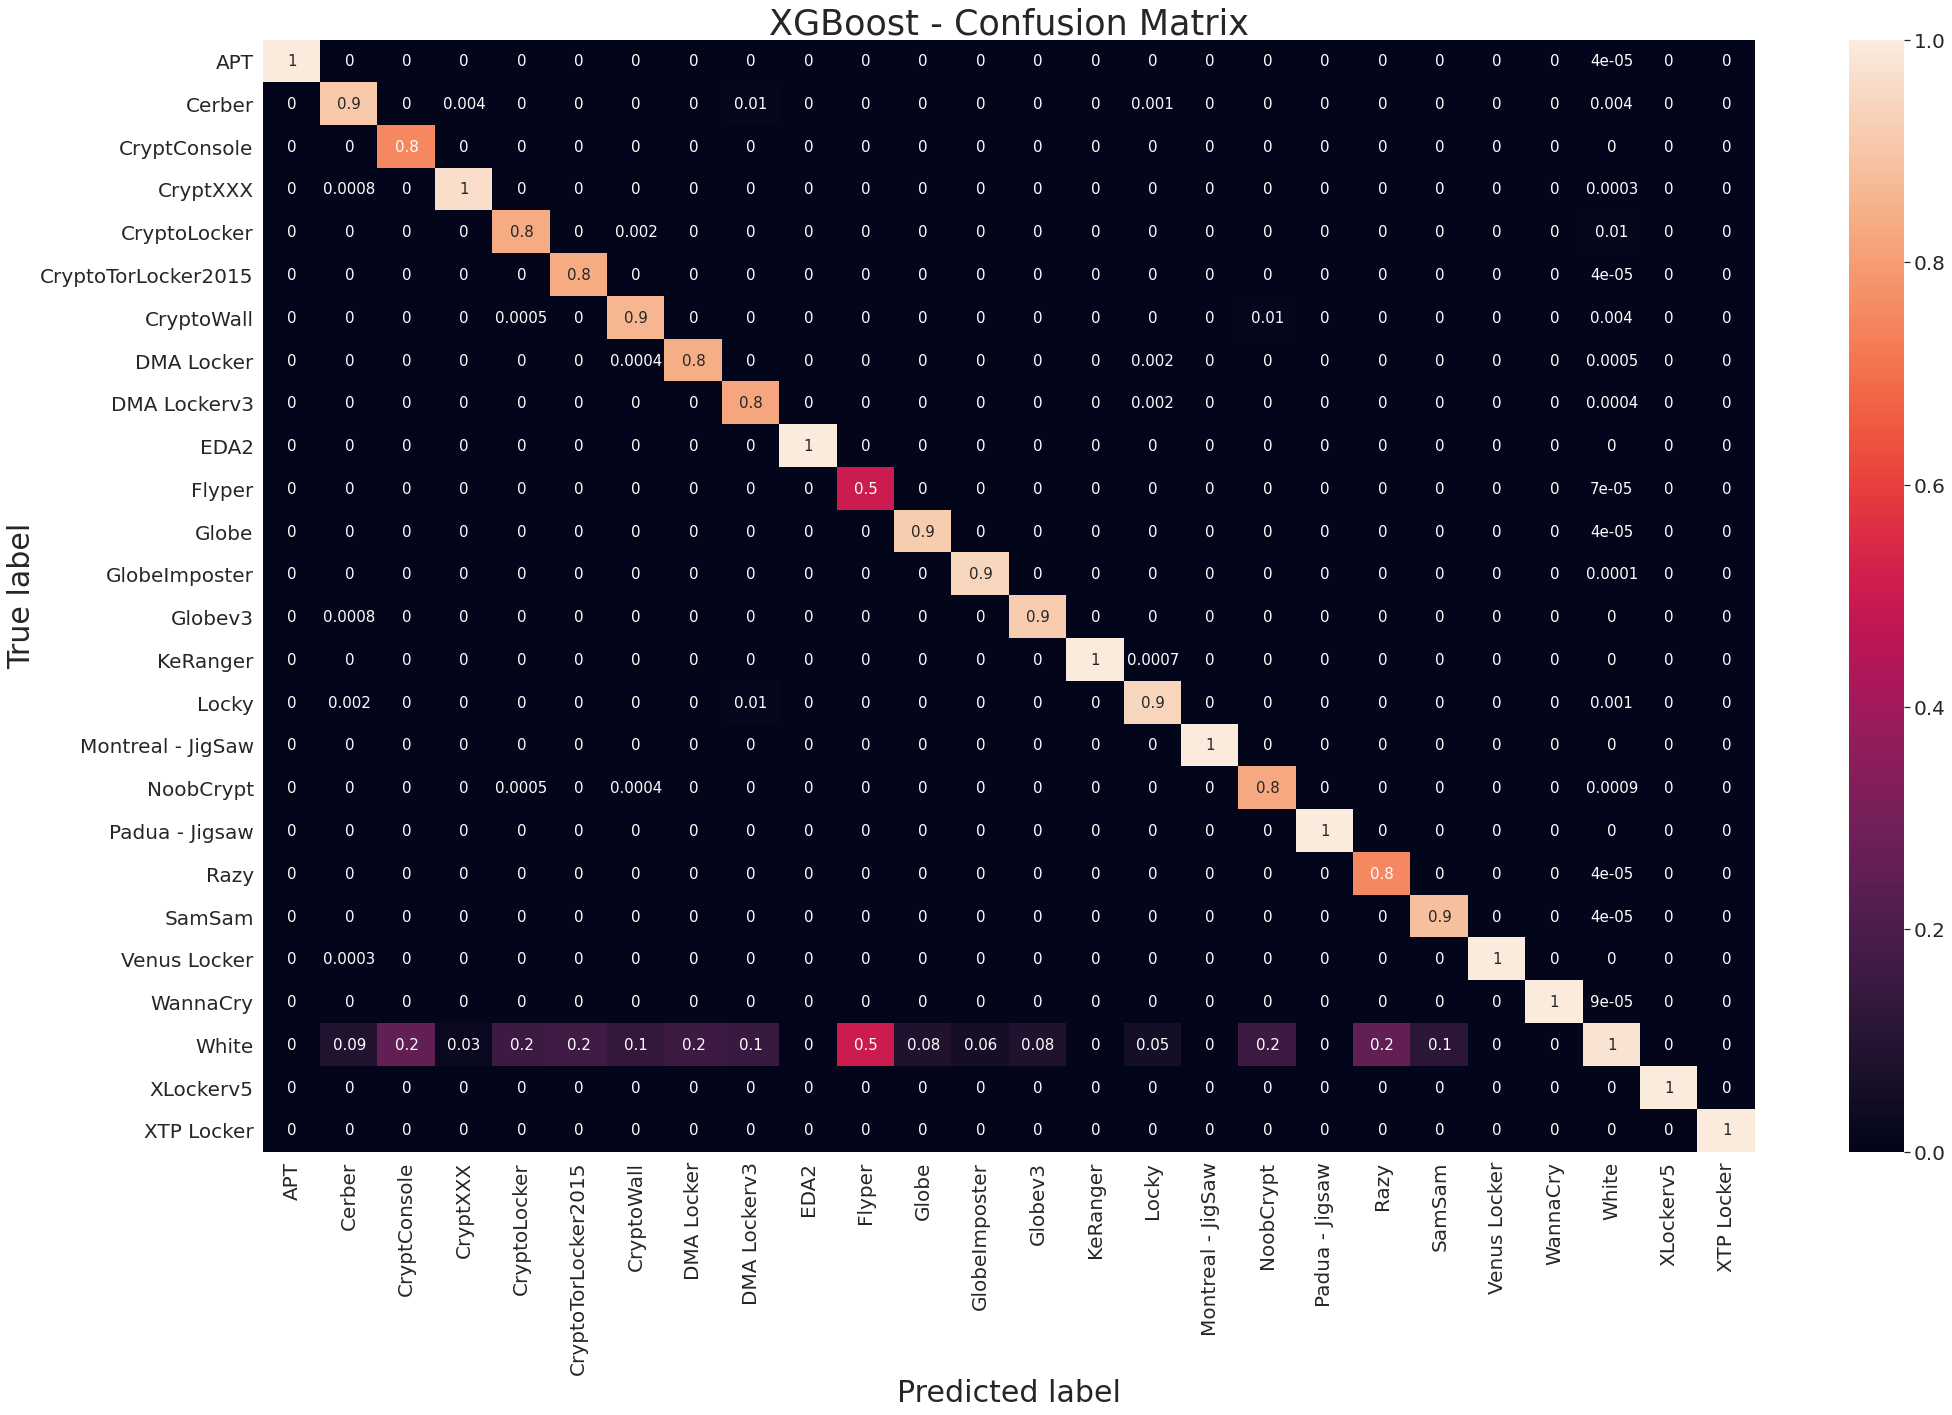

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
cm = confusion_matrix(y_test, predictions,normalize='pred')

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = le2.classes_, 
                     columns = le2.classes_)

plt.figure(figsize=(30,20))
ax = sns.heatmap(cm_df, annot=True,fmt='.1g',annot_kws={"size":15},vmin=cm_df.values.min(), vmax=cm_df.values.max(),cbar_kws={"shrink": 1})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
plt.title('XGBoost - Confusion Matrix'.format(accuracy_score(y_test, predictions)),fontsize=35)
plt.ylabel('True label',fontsize=30)
plt.xlabel('Predicted label',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/Bitcoin Heist/Plots/ConfusionMatrix.png',dpi=700, edgecolor = 'black',pad_inches = 0)
plt.show()

###Extra Trees

Use GridSearchCV to get the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()

parameters = {'ccp_alpha':[0.0], #default value       
             'max_features':['log2','auto'],
              'min_samples_split':[3,4],  #2->4->3
              }
              
clf = GridSearchCV(model, parameters,
                   cv=StratifiedKFold(n_splits=2), 
                   scoring='accuracy',
                   verbose=2, refit=True)

clf.fit(np.array(X),np.array(y))
print(clf.best_params_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] ccp_alpha=0.0, max_features=log2, min_samples_split=3 ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ccp_alpha=0.0, max_features=log2, min_samples_split=3, total=  14.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.2s remaining:    0.0s


[CV] ccp_alpha=0.0, max_features=log2, min_samples_split=3 ...........
[CV]  ccp_alpha=0.0, max_features=log2, min_samples_split=3, total=  14.8s
[CV] ccp_alpha=0.0, max_features=log2, min_samples_split=4 ...........
[CV]  ccp_alpha=0.0, max_features=log2, min_samples_split=4, total=  13.3s
[CV] ccp_alpha=0.0, max_features=log2, min_samples_split=4 ...........
[CV]  ccp_alpha=0.0, max_features=log2, min_samples_split=4, total=  14.1s
[CV] ccp_alpha=0.0, max_features=auto, min_samples_split=3 ...........
[CV]  ccp_alpha=0.0, max_features=auto, min_samples_split=3, total=  13.4s
[CV] ccp_alpha=0.0, max_features=auto, min_samples_split=3 ...........
[CV]  ccp_alpha=0.0, max_features=auto, min_samples_split=3, total=  14.8s
[CV] ccp_alpha=0.0, max_features=auto, min_samples_split=4 ...........
[CV]  ccp_alpha=0.0, max_features=auto, min_samples_split=4, total=  13.4s
[CV] ccp_alpha=0.0, max_features=auto, min_samples_split=4 ...........
[CV]  ccp_alpha=0.0, max_features=auto, min_samples_s

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.0min finished


{'ccp_alpha': 0.0, 'max_features': 'auto', 'min_samples_split': 3}


Train Extra Trees with best parameters

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model_etc = ExtraTreesClassifier(max_features='auto',min_samples_split=3)
model_etc.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=3,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

Check model performance

In [ ]:
predictions = model_etc.predict(np.array(X_test))
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_test, predictions) 
acc = accuracy_score(y_test, predictions)
f1_score = f1_score(y_test, predictions,average='weighted')
recall = recall_score(y_test, predictions,average='weighted')
precision = precision_score(y_test, predictions,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

Mean Absolute Error :  0.8438902901378512
Accuracy:  0.9510779041545709
Recall:  0.9510779041545709
Precision:  0.9523149654311994
F1-score:  0.9513764426517863


Print the classification report

In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_test, predictions, target_names=le2.classes_, digits = 4, output_dict=True)
classification_metrics_etc = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_etc)

                     precision    recall  f1-score       support
APT                   1.000000  0.500000  0.666667      4.000000
Cerber                0.902814  0.939279  0.920686   3689.000000
CryptConsole          0.750000  1.000000  0.857143      3.000000
CryptXXX              0.962012  0.967975  0.964985    968.000000
CryptoLocker          0.855987  0.880569  0.868104   3726.000000
CryptoTorLocker2015   0.947368  0.818182  0.878049     22.000000
CryptoWall            0.866040  0.948345  0.905326   4956.000000
DMA Locker            0.887500  0.710000  0.788889    100.000000
DMA Lockerv3          0.887097  0.774648  0.827068    142.000000
EDA2                  1.000000  1.000000  1.000000      2.000000
Flyper                1.000000  0.500000  0.666667      4.000000
Globe                 1.000000  0.846154  0.916667     13.000000
GlobeImposter         0.900000  0.818182  0.857143     22.000000
Globev3               1.000000  0.785714  0.880000     14.000000
KeRanger              1.0

###Random Forest

Use GridSearchCV to get the best parameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold

model = RandomForestClassifier()
parameters = {'n_estimators': [150, 250],
              'max_features' : ['auto', 'sqrt', 0.2]
              }
clf = GridSearchCV(model, parameters, n_jobs = 4,
                   cv=StratifiedKFold(n_splits=2), 
                   scoring='accuracy',
                   verbose=2, refit=True)

clf.fit(np.array(X),np.array(y))
print(clf.best_params_)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:  6.6min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:  6.6min finished


{'max_features': 0.2, 'n_estimators': 150}


Train Random Trees with best parameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 150, n_jobs=-1, max_features=0.2)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
predictions = model_rf.predict(np.array(X_test))
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_test, predictions) 
acc = accuracy_score(y_test, predictions)
f1_score = f1_score(y_test, predictions,average='weighted')
recall = recall_score(y_test, predictions,average='weighted')
precision = precision_score(y_test, predictions,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

Mean Absolute Error :  0.8549945271974492
Accuracy:  0.9507923666301813
Recall:  0.9507923666301813
Precision:  0.9525484469060577
F1-score:  0.9512191386399786


In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_test, predictions, target_names=le2.classes_, digits = 4, output_dict=True)
classification_metrics_rf = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_rf)

                     precision    recall  f1-score       support
APT                   1.000000  0.500000  0.666667      4.000000
Cerber                0.899639  0.945243  0.921877   3689.000000
CryptConsole          1.000000  1.000000  1.000000      3.000000
CryptXXX              0.971164  0.974174  0.972666    968.000000
CryptoLocker          0.840805  0.885937  0.862781   3726.000000
CryptoTorLocker2015   1.000000  0.818182  0.900000     22.000000
CryptoWall            0.860849  0.957425  0.906572   4956.000000
DMA Locker            0.887500  0.710000  0.788889    100.000000
DMA Lockerv3          0.903226  0.788732  0.842105    142.000000
EDA2                  1.000000  1.000000  1.000000      2.000000
Flyper                1.000000  0.500000  0.666667      4.000000
Globe                 1.000000  0.846154  0.916667     13.000000
GlobeImposter         1.000000  0.818182  0.900000     22.000000
Globev3               1.000000  0.785714  0.880000     14.000000
KeRanger              1.0

###AE on entire dataset

In [ ]:
input_size = X.shape[-1]
hidden_size = 6
code_size = 4

In [ ]:
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1
from keras.optimizers import Adam
K.clear_session()
num_labels = len(data.label.unique()) 

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

input_feats = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_feats)
hidden_1 = Dense(hidden_size-1, activation='relu')(hidden_1)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size-1, activation='relu')(code)
hidden_2 = Dense(hidden_size, activation='relu')(hidden_2)
output_feats = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_feats, output_feats)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

EPOCHS = 256
BATCH_SIZE = 25

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=2,
    patience=10,
    mode='auto',
    restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
                            monitor='val_loss', 
                            factor=0.1, 
                            patience=3, 
                            verbose=2, 
                            mode='auto',
                            min_delta=0.0001, 
                            min_lr=0.0000001)

callbacks = [early_stopping, reduce_lr]
baseline_history_2 = autoencoder.fit(X_train,
                                    X_train,
                                    batch_size=BATCH_SIZE,
                                    epochs=EPOCHS,
                                    callbacks=callbacks,
                                    validation_data=(X_test, X_test))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 6)                 54        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 35        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 56    

In [ ]:
autoencoder_pred = autoencoder.predict(X_test)
autoencoder_pred

array([[9.3752742e-01, 1.1548466e-01, 5.2440929e-01, ..., 9.7764365e-02,
        7.9037321e-01, 5.3789151e-01],
       [5.7370907e-01, 1.6028865e-01, 3.3142623e-01, ..., 9.5831290e-02,
        9.8631358e-01, 7.9977012e-01],
       [5.9892035e-01, 1.3885172e-01, 5.8900774e-01, ..., 5.5356465e-02,
        5.1136810e-04, 7.1102172e-01],
       ...,
       [7.7957261e-01, 9.6391000e-02, 2.4140379e-01, ..., 5.7731796e-02,
        7.8049088e-01, 9.5377254e-01],
       [7.2345084e-01, 1.4039522e-01, 3.1397060e-01, ..., 9.6135065e-02,
        9.9351752e-01, 8.1627935e-01],
       [7.3494387e-01, 1.1615266e-01, 2.1872063e-01, ..., 7.8187674e-02,
        9.9492526e-01, 9.3248427e-01]], dtype=float32)

In [ ]:
print(np.round(autoencoder_pred[2],2))
print(np.round(np.array(X_test.iloc[2]),2))
print()
print(np.round(autoencoder_pred[50],2))
print(np.round(np.array(X_test.iloc[50]),2))
print()
print(np.round(autoencoder_pred[99],2))
print(np.round(np.array(X_test.iloc[99]),2))

[0.6  0.14 0.59 0.   0.   0.06 0.   0.71]
[0.57 0.12 0.53 0.   0.   0.   0.   0.67]

[0.06 0.28 0.41 0.08 0.36 0.09 0.67 0.73]
[0.   0.14 0.48 0.07 0.42 0.   0.73 0.79]

[0.41 0.18 0.32 0.81 0.86 0.09 0.98 0.81]
[0.43 0.09 0.2  0.77 0.86 0.09 1.   0.87]


In [ ]:
autoencoder_pred = pd.DataFrame(autoencoder_pred, columns = ['year','day', 'length','weight',  'count', 'looped', 'neighbors',  'income'])

In [ ]:
autoencoder_pred["label"] = y_test.values
# autoencoder_pred.to_csv('/content/drive/MyDrive/Bitcoin Heist/Data/Mini Project Data Augmentation/AE_pred.csv')

###Variational AE on entire dataset

In [ ]:
y = pd.DataFrame(y)
y.reset_index(inplace=True, drop=True)
X.reset_index(inplace=True, drop=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, stratify = y, random_state = 2020, shuffle=True)
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')

In [ ]:
input_size = X.shape[-1]
hidden_size = 6
code_size = 4

In [ ]:
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, Lambda
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1
from keras.optimizers import Adam
K.clear_session()
num_labels = len(data.label.unique()) 

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], code_size),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

input_feats = Input(shape=(input_size,))    #8
hidden_1 = Dense(hidden_size, activation='relu')(input_feats)   #6
hidden_1 = Dense(hidden_size-1, activation='relu')(hidden_1)    #5
z_mean = Dense(code_size)(hidden_1) #4
z_log_sigma = Dense(code_size)(hidden_1)    
z = Lambda(sampling)([z_mean, z_log_sigma]) 

# Create encoder
encoder = Model(input_feats, [z_mean, z_log_sigma, z], name='encoder')
encoder.summary()

decoder_input = Input(shape=(code_size), name='z_sampling')
hidden_2 = Dense(hidden_size-1, activation='relu')(decoder_input)
hidden_2 = Dense(hidden_size, activation='relu')(hidden_2)
output_feats = Dense(input_size, activation='sigmoid')(hidden_2)

decoder = Model(decoder_input, output_feats, name='decoder')
decoder.summary()

# instantiate VAE model
output_feats = decoder(encoder(input_feats)[2])
vae = keras.Model(input_feats, output_feats, name='vae_mlp')

reconstruction_loss = keras.losses.binary_crossentropy(input_feats, output_feats)
reconstruction_loss *= input_size
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

EPOCHS = 256
BATCH_SIZE = 25

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=2,
    patience=10,
    mode='auto',
    restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
                            monitor='val_loss', 
                            factor=0.1, 
                            patience=3, 
                            verbose=2, 
                            mode='auto',
                            min_delta=0.0001, 
                            min_lr=0.0000001)

callbacks = [early_stopping, reduce_lr]
baseline_history = vae.fit( X_train,
                            X_train,    #Semi Supervised
                            batch_size=BATCH_SIZE,
                            epochs=EPOCHS,
                            callbacks=callbacks,
                            validation_data=(X_test, X_test))

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 6)            54          input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 5)            35          dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 4)            24          dense_1[0][0]                    
____________________________________________________________________________________________

In [ ]:
y_test.reset_index(inplace=True, drop=True)
y_test

,label
0,23
1,23
2,6
3,23
4,3
...,...
63034,4
63035,23
63036,23
63037,1


In [ ]:
vae_pred = vae.predict(X_test)
vae_pred

array([[0.9671348 , 0.08718623, 0.40504593, ..., 0.06460451, 0.75666696,
        0.56761223],
       [0.61445206, 0.15644626, 0.29553753, ..., 0.12084033, 0.9954448 ,
        0.88199717],
       [0.72350293, 0.12053005, 0.45904467, ..., 0.05758764, 0.11993938,
        0.82861525],
       ...,
       [0.75199264, 0.11132954, 0.3577107 , ..., 0.06891499, 0.81069595,
        0.92345834],
       [0.59742457, 0.16449201, 0.33140332, ..., 0.12710008, 0.9897804 ,
        0.87218714],
       [0.62071836, 0.13312323, 0.28981483, ..., 0.07198227, 0.9825554 ,
        0.8952846 ]], dtype=float32)

In [ ]:
print(np.round(vae_pred[2],2))
print(np.round(np.array(X_test.iloc[2]),2))
print()
print(np.round(vae_pred[50],2))
print(np.round(np.array(X_test.iloc[50]),2))
print()
print(np.round(vae_pred[99],2))
print(np.round(np.array(X_test.iloc[99]),2))

[0.72 0.12 0.46 0.   0.   0.06 0.12 0.83]
[0.57 0.12 0.53 0.   0.   0.   0.   0.67]

[0.06 0.24 0.38 0.04 0.22 0.09 0.57 0.94]
[0.   0.14 0.48 0.07 0.42 0.   0.73 0.79]

[0.51 0.2  0.34 0.8  0.84 0.16 0.99 0.77]
[0.43 0.09 0.2  0.77 0.86 0.09 1.   0.87]


In [ ]:
vae_pred = pd.DataFrame(vae_pred, columns = ['year','day', 'length','weight',  'count', 'looped', 'neighbors',  'income'])

In [ ]:
vae_pred["label"] = y_test.values
# vae_pred.to_csv('/content/drive/MyDrive/Bitcoin Heist/Data/Mini Project Data Augmentation/VAE_pred.csv')

###Check how accurate the augmented data is

Import AE & VAE augmented data

In [ ]:
ae_pred_whole = pd.read_csv('/content/drive/MyDrive/Bitcoin Heist/Data/Mini Project Data Augmentation/AE_pred.csv', index_col=0)
vae_pred_whole = pd.read_csv('/content/drive/MyDrive/Bitcoin Heist/Data/Mini Project Data Augmentation/VAE_pred.csv', index_col=0)

In [ ]:
X_whole_ae = ae_pred_whole.loc[:, ae_pred_whole.columns != 'label']
y_whole_ae = ae_pred_whole['label']
print(X_ae_whole)
print(y_ae_whole)

X_whole_vae = vae_pred_whole.loc[:, vae_pred_whole.columns != 'label']
y_whole_vae = vae_pred_whole['label']
print(X_vae_whole)
print(y_vae_whole)

            year       day    length  ...    looped  neighbors    income
0       0.000000  0.358127  0.427442  ...  0.188771   0.833801  0.722456
1       0.286069  0.180886  0.215964  ...  0.000000   0.775448  0.872451
2       0.000000  0.296294  0.299706  ...  0.000000   0.000000  0.990938
3       0.428997  0.038623  0.404248  ...  0.000000   0.000000  0.983424
4       0.857355  0.084077  0.382492  ...  0.000000   1.000000  0.958652
...          ...       ...       ...  ...       ...        ...       ...
126082  0.214114  0.195417  0.429724  ...  0.085971   0.853599  0.752127
126083  0.441608  0.133398  0.163975  ...  0.087149   0.985804  0.840148
126084  0.715412  0.040241  0.369050  ...  0.089847   0.804976  0.838895
126085  0.713554  0.011348  0.450848  ...  0.087285   0.000080  0.889623
126086  0.713554  0.011348  0.450848  ...  0.087285   0.000080  0.889623

[126087 rows x 8 columns]
0         23
1         23
2         23
3         23
4         23
          ..
126082    23
126083

In [ ]:
whole_ae_pred = model_xgb.predict(np.array(X_whole_ae))
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_whole_ae, whole_ae_pred) 
acc = accuracy_score(y_whole_ae, whole_ae_pred)
f1_score = f1_score(y_whole_ae, whole_ae_pred,average='weighted')
recall = recall_score(y_whole_ae, whole_ae_pred,average='weighted')
precision = precision_score(y_whole_ae, whole_ae_pred,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

Mean Absolute Error :  2.6262739219745095
Accuracy:  0.8436793642484951
Recall:  0.8436793642484951
Precision:  0.8463748434447946
F1-score:  0.8344557530047905


In [ ]:
whole_vae_pred = model_xgb.predict(np.array(X_whole_vae))
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_whole_vae, whole_vae_pred) 
acc = accuracy_score(y_whole_vae, whole_vae_pred)
f1_score = f1_score(y_whole_vae, whole_vae_pred,average='weighted')
recall = recall_score(y_whole_vae, whole_vae_pred,average='weighted')
precision = precision_score(y_whole_vae, whole_vae_pred,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

Mean Absolute Error :  2.3601646521366706
Accuracy:  0.8595222232797183
Recall:  0.8595222232797183
Precision:  0.8592871763835459
F1-score:  0.849271662166429


In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_whole_ae, whole_ae_pred, target_names=le2.classes_, digits = 4, output_dict=True)
classification_metrics_xgb = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_xgb)

                     precision    recall  f1-score        support
APT                   1.000000  0.222222  0.363636       9.000000
Cerber                0.908524  0.553191  0.687668    7379.000000
CryptConsole          0.750000  0.500000  0.600000       6.000000
CryptXXX              0.904167  0.560434  0.691964    1936.000000
CryptoLocker          0.822782  0.434246  0.568467    7452.000000
CryptoTorLocker2015   0.833333  0.454545  0.588235      44.000000
CryptoWall            0.649394  0.767454  0.703505    9912.000000
DMA Locker            0.492958  0.348259  0.408163     201.000000
DMA Lockerv3          0.609137  0.422535  0.498960     284.000000
EDA2                  1.000000  0.400000  0.571429       5.000000
Flyper                0.500000  0.125000  0.200000       8.000000
Globe                 0.916667  0.423077  0.578947      26.000000
GlobeImposter         0.944444  0.386364  0.548387      44.000000
Globev3               0.916667  0.392857  0.550000      28.000000
KeRanger  

In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_whole_vae, whole_vae_pred, target_names=le2.classes_, digits = 4, output_dict=True)
classification_metrics_xgb = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_xgb)

                     precision    recall  f1-score        support
APT                   1.000000  0.222222  0.363636       9.000000
Cerber                0.885196  0.548584  0.677376    7379.000000
CryptConsole          0.750000  0.500000  0.600000       6.000000
CryptXXX              0.898451  0.539256  0.673983    1936.000000
CryptoLocker          0.827191  0.454777  0.586891    7452.000000
CryptoTorLocker2015   0.833333  0.454545  0.588235      44.000000
CryptoWall            0.746668  0.842111  0.791522    9912.000000
DMA Locker            0.593750  0.378109  0.462006     201.000000
DMA Lockerv3          0.703030  0.408451  0.516704     284.000000
EDA2                  1.000000  0.400000  0.571429       5.000000
Flyper                0.500000  0.125000  0.200000       8.000000
Globe                 0.916667  0.423077  0.578947      26.000000
GlobeImposter         0.894737  0.386364  0.539683      44.000000
Globev3               0.916667  0.392857  0.550000      28.000000
KeRanger  

In [ ]:
whole_ae_pred = model_etc.predict(np.array(X_whole_ae))
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_whole_ae, whole_ae_pred) 
acc = accuracy_score(y_whole_ae, whole_ae_pred)
f1_score = f1_score(y_whole_ae, whole_ae_pred,average='weighted')
recall = recall_score(y_whole_ae, whole_ae_pred,average='weighted')
precision = precision_score(y_whole_ae, whole_ae_pred,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

Mean Absolute Error :  2.6398182077761385
Accuracy:  0.8454766097177937
Recall:  0.8454766097177937
Precision:  0.8489676830772974
F1-score:  0.8290820800896354


In [ ]:
whole_vae_pred = model_etc.predict(np.array(X_whole_vae))
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_whole_vae, whole_vae_pred) 
acc = accuracy_score(y_whole_vae, whole_vae_pred)
f1_score = f1_score(y_whole_vae, whole_vae_pred,average='weighted')
recall = recall_score(y_whole_vae, whole_vae_pred,average='weighted')
precision = precision_score(y_whole_vae, whole_vae_pred,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

Mean Absolute Error :  2.1900954918942928
Accuracy:  0.8698883284159766
Recall:  0.8698883284159766
Precision:  0.8709095279806064
F1-score:  0.8585523811507426


In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_whole_ae, whole_ae_pred, target_names=le2.classes_, digits = 4, output_dict=True)
classification_metrics_xgb = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_xgb)

                     precision    recall  f1-score        support
APT                   1.000000  0.222222  0.363636       9.000000
Cerber                0.908524  0.553191  0.687668    7379.000000
CryptConsole          0.750000  0.500000  0.600000       6.000000
CryptXXX              0.904167  0.560434  0.691964    1936.000000
CryptoLocker          0.822782  0.434246  0.568467    7452.000000
CryptoTorLocker2015   0.833333  0.454545  0.588235      44.000000
CryptoWall            0.649394  0.767454  0.703505    9912.000000
DMA Locker            0.492958  0.348259  0.408163     201.000000
DMA Lockerv3          0.609137  0.422535  0.498960     284.000000
EDA2                  1.000000  0.400000  0.571429       5.000000
Flyper                0.500000  0.125000  0.200000       8.000000
Globe                 0.916667  0.423077  0.578947      26.000000
GlobeImposter         0.944444  0.386364  0.548387      44.000000
Globev3               0.916667  0.392857  0.550000      28.000000
KeRanger  

In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_whole_vae, whole_vae_pred, target_names=le2.classes_, digits = 4, output_dict=True)
classification_metrics_xgb = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_xgb)

                     precision    recall  f1-score        support
APT                   1.000000  0.222222  0.363636       9.000000
Cerber                0.871263  0.592492  0.705332    7379.000000
CryptConsole          0.750000  0.500000  0.600000       6.000000
CryptXXX              0.919540  0.578512  0.710209    1936.000000
CryptoLocker          0.852559  0.449275  0.588452    7452.000000
CryptoTorLocker2015   0.947368  0.409091  0.571429      44.000000
CryptoWall            0.869737  0.664851  0.753617    9912.000000
DMA Locker            0.887500  0.353234  0.505338     201.000000
DMA Lockerv3          0.887097  0.387324  0.539216     284.000000
EDA2                  1.000000  0.400000  0.571429       5.000000
Flyper                1.000000  0.250000  0.400000       8.000000
Globe                 1.000000  0.423077  0.594595      26.000000
GlobeImposter         0.900000  0.409091  0.562500      44.000000
Globev3               1.000000  0.392857  0.564103      28.000000
KeRanger  

In [ ]:
whole_ae_pred = model_rf.predict(np.array(X_whole_ae))
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_whole_ae, whole_ae_pred) 
acc = accuracy_score(y_whole_ae, whole_ae_pred)
f1_score = f1_score(y_whole_ae, whole_ae_pred,average='weighted')
recall = recall_score(y_whole_ae, whole_ae_pred,average='weighted')
precision = precision_score(y_whole_ae, whole_ae_pred,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

Mean Absolute Error :  1.8369300562310151
Accuracy:  0.889140038227573
Recall:  0.889140038227573
Precision:  0.8875093154619498
F1-score:  0.8810062804087395


In [ ]:
whole_vae_pred = model_rf.predict(np.array(X_whole_vae))
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_whole_vae, whole_vae_pred) 
acc = accuracy_score(y_whole_vae, whole_vae_pred)
f1_score = f1_score(y_whole_vae, whole_vae_pred,average='weighted')
recall = recall_score(y_whole_vae, whole_vae_pred,average='weighted')
precision = precision_score(y_whole_vae, whole_vae_pred,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

Mean Absolute Error :  1.8407252307985154
Accuracy:  0.8896370673519242
Recall:  0.8896370673519242
Precision:  0.8871715748516404
F1-score:  0.8821900584923739


In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_whole_ae, whole_ae_pred, target_names=le2.classes_, digits = 4, output_dict=True)
classification_metrics_rf = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_rf)

                     precision    recall  f1-score       support
APT                   1.000000  0.222222  0.363636       9.00000
Cerber                0.847286  0.725573  0.781720    7379.00000
CryptConsole          1.000000  0.500000  0.666667       6.00000
CryptXXX              0.968007  0.547004  0.699010    1936.00000
CryptoLocker          0.835693  0.443639  0.579593    7452.00000
CryptoTorLocker2015   1.000000  0.409091  0.580645      44.00000
CryptoWall            0.859592  0.829500  0.844278    9912.00000
DMA Locker            0.876543  0.353234  0.503546     201.00000
DMA Lockerv3          0.791667  0.401408  0.532710     284.00000
EDA2                  1.000000  0.400000  0.571429       5.00000
Flyper                1.000000  0.250000  0.400000       8.00000
Globe                 1.000000  0.423077  0.594595      26.00000
GlobeImposter         0.750000  0.409091  0.529412      44.00000
Globev3               1.000000  0.392857  0.564103      28.00000
KeRanger              1.0

In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_whole_vae, whole_vae_pred, target_names=le2.classes_, digits = 4, output_dict=True)
classification_metrics_rf = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_rf)

                     precision    recall  f1-score        support
APT                   1.000000  0.222222  0.363636       9.000000
Cerber                0.851177  0.696029  0.765824    7379.000000
CryptConsole          1.000000  0.500000  0.666667       6.000000
CryptXXX              0.904000  0.525310  0.664489    1936.000000
CryptoLocker          0.807060  0.493961  0.612836    7452.000000
CryptoTorLocker2015   1.000000  0.409091  0.580645      44.000000
CryptoWall            0.875117  0.847659  0.861169    9912.000000
DMA Locker            0.811111  0.363184  0.501718     201.000000
DMA Lockerv3          0.903226  0.394366  0.549020     284.000000
EDA2                  1.000000  0.400000  0.571429       5.000000
Flyper                1.000000  0.250000  0.400000       8.000000
Globe                 1.000000  0.423077  0.594595      26.000000
GlobeImposter         1.000000  0.409091  0.580645      44.000000
Globev3               1.000000  0.392857  0.564103      28.000000
KeRanger  

###More insights into code layer of VAEs

In [ ]:
x_test_encoded = encoder.predict(X_test)

lst1_0 = [item[0] for item in x_test_encoded[:][0]]
lst1_1 = [item[1] for item in x_test_encoded[:][0]]
lst1_2 = [item[2] for item in x_test_encoded[:][0]]
lst1_3 = [item[3] for item in x_test_encoded[:][0]]  
lst2_0 = [item[0] for item in x_test_encoded[:][1]]
lst2_1 = [item[1] for item in x_test_encoded[:][1]]
lst2_2 = [item[2] for item in x_test_encoded[:][1]]
lst2_3 = [item[3] for item in x_test_encoded[:][1]]  
lst3_0 = [item[0] for item in x_test_encoded[:][2]]
lst3_1 = [item[1] for item in x_test_encoded[:][2]]
lst3_2 = [item[2] for item in x_test_encoded[:][2]]
lst3_3 = [item[3] for item in x_test_encoded[:][2]]
len(lst2)

63039

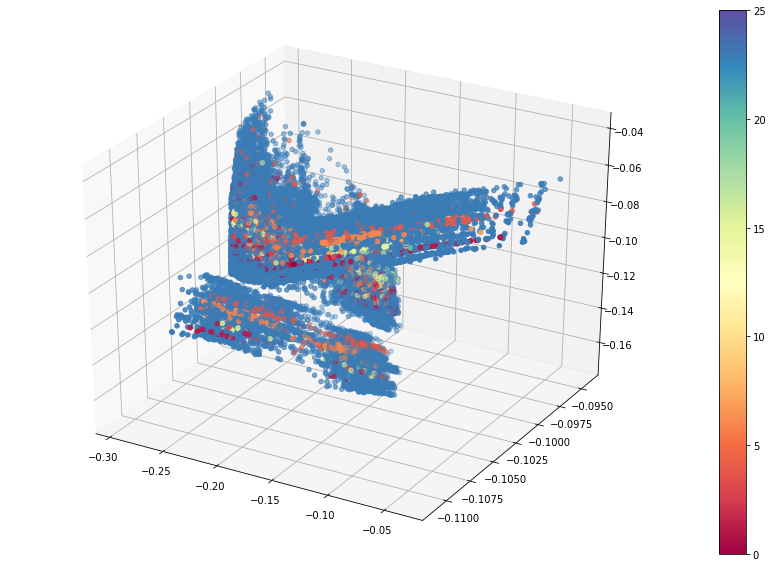

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")
p2 = ax.scatter3D(lst2_0, lst2_1, lst2_2,cmap='Spectral',c = y_test.values)
cbar = fig.colorbar(p1)
plt.savefig('/content/drive/MyDrive/Bitcoin Heist/Plots/VAE - Latent Space.jpeg',dpi=500)
plt.show()

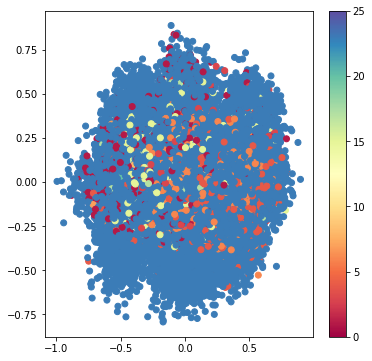

In [ ]:
x_test_encoded = encoder.predict(X_test, batch_size=BATCH_SIZE)
plt.figure(figsize=(6, 6))
plt.scatter(lst3_0, lst3_1,cmap='Spectral',c = y_test.values)
plt.scatter(lst3_2, lst3_3,cmap='Spectral',c = y_test.values)
plt.colorbar()
plt.show()

###A JavaScript trick! 😎

Code to generate automated clicks in the browser

In [ ]:
'''function ClickConnect(){
  console.log("Connnect Clicked - Start"); 
  document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click();
  console.log("Connnect Clicked - End"); 
};
setInterval(ClickConnect, 60000)'''